## Kurang dari 200

In [ ]:
# Import Library
import pandas as pd
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from transformers import TFBertForSequenceClassification


In [ ]:
import re
df = pd.read_csv('/content/dataset_sampled_kurang_200 (2).csv')
def text_preprocessing(text):
    # Mengubah semua karakter menjadi huruf kecil
    text = text.lower()
    text = text.replace('\n', ' ').replace('\r', ' ')
    text = re.sub(r'[^\w\s]', '', text)

    # Menghapus spasi di awal dan akhir teks
    text = text.strip()

    return text


df['text'] = df['text'].apply(lambda x: text_preprocessing(x))

In [ ]:
import pandas as pd

# Memeriksa apakah ada duplikasi dalam data
duplicates = df.duplicated()

# Menampilkan jumlah baris duplikat
print(f"Jumlah duplikasi: {duplicates.sum()}")

# Menampilkan baris yang duplikat (jika ada)
if duplicates.sum() > 0:
    print("Baris duplikat:")
    print(df[duplicates])
else:
    print("Tidak ada duplikasi ditemukan.")


Jumlah duplikasi: 0
Tidak ada duplikasi ditemukan.


In [ ]:
X = df['text']
y = df['class']

In [ ]:
# Membagi dataset menjadi data pelatihan dan pengujian (75% train, 25% test)
train_texts, test_texts, train_labels, test_labels = train_test_split(X, y, test_size=0.25, random_state=42)

# Membagi data pelatihan menjadi data pelatihan dan validasi (90% train, 10% validation)
train_texts, val_texts, train_labels, val_labels = train_test_split(train_texts, train_labels, test_size=0.1, random_state=42)

In [ ]:
# Menampilkan jumlah data pada masing-masing set
print(f"Jumlah data train: {len(train_texts)}")
print(f"Jumlah data validation: {len(val_texts)}")
print(f"Jumlah data test: {len(test_texts)}")

Jumlah data train: 305
Jumlah data validation: 34
Jumlah data test: 113


In [ ]:
# Assuming train_texts and test_texts are your pandas Series objects
train_texts_list = train_texts.tolist()
test_texts_list = test_texts.tolist()
val_texts_list = val_texts.tolist()

In [ ]:
# Menggunakan tokenizer BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
train_encodings = tokenizer(train_texts_list, truncation=True, padding=True, max_length=300)
test_encodings = tokenizer(test_texts_list, truncation=True, padding=True, max_length=300)
val_encodings = tokenizer(val_texts_list, truncation=True, padding=True, max_length=300)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_labels
))
test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    test_labels
))
val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    val_labels
))

In [ ]:
# Memuat model BERT untuk klasifikasi teks (contoh: sentimen positif/negatif)
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Optimizer
optimizer = tf.keras.optimizers.AdamW(learning_rate=3e-5, weight_decay=0.02)

# Model
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
model.dropout = tf.keras.layers.Dropout(0.2)
model.compile(optimizer=optimizer, loss=model.hf_compute_loss, metrics=['accuracy'])


# Early stopping callback
# early_stopping = tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss',  # metric to monitor
#     patience=3,          # number of epochs with no improvement after which training will be stopped
#     restore_best_weights=True  # restore the model weights from the epoch with the best value of the monitored metric
# )

# Training
history = model.fit(
    train_dataset.shuffle(25).batch(8),
    epochs=25,
    validation_data=val_dataset.batch(8),
    # callbacks=[early_stopping]
)



All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/25
39/39 [==============================] - 66s 547ms/step - loss: 0.3627 - accuracy: 0.8492 - val_loss: 0.3927 - val_accuracy: 0.8529
Epoch 2/25
39/39 [==============================] - 19s 492ms/step - loss: 0.1094 - accuracy: 0.9705 - val_loss: 0.1353 - val_accuracy: 0.9412
Epoch 3/25
39/39 [==============================] - 19s 487ms/step - loss: 0.0816 - accuracy: 0.9770 - val_loss: 0.0480 - val_accuracy: 1.0000
Epoch 4/25
39/39 [==============================] - 19s 485ms/step - loss: 0.0148 - accuracy: 0.9967 - val_loss: 0.0443 - val_accuracy: 0.9706
Epoch 5/25
39/39 [==============================] - 19s 477ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.0158 - val_accuracy: 1.0000
Epoch 6/25
39/39 [==============================] - 19s 476ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0115 - val_accuracy: 1.0000
Epoch 7/25
39/39 [==============================] - 19s 480ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0092 - val_accuracy: 1.0000

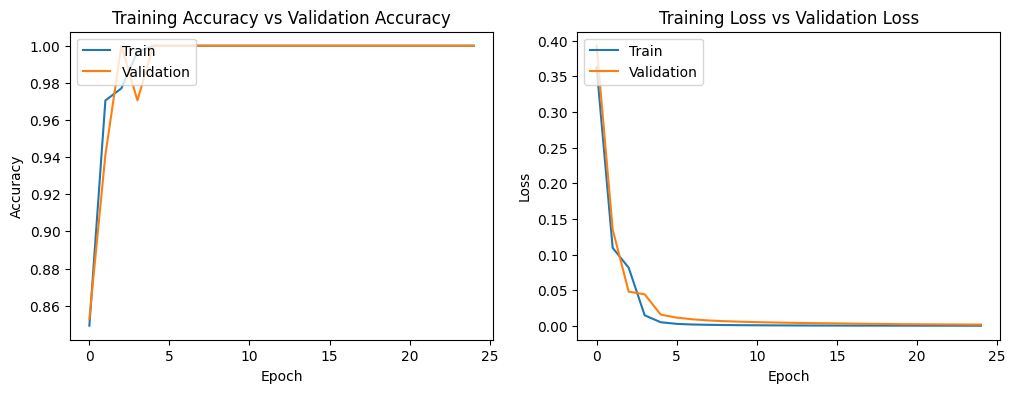

In [ ]:
import matplotlib.pyplot as plt
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
# Evaluasi Model
loss, accuracy = model.evaluate(test_dataset.batch(16))
print("Akurasi:", accuracy)
print("Loss:", loss)

8/8 [==============================] - 5s 252ms/step - loss: 0.0862 - accuracy: 0.9735
Akurasi: 0.9734513163566589
Loss: 0.0862431451678276


8/8 [==============================] - 5s 248ms/step
Confusion Matrix:
[[53  3]
 [ 0 57]]
                 precision    recall  f1-score   support

Human generated       1.00      0.95      0.97        56
  GPT generated       0.95      1.00      0.97        57

       accuracy                           0.97       113
      macro avg       0.97      0.97      0.97       113
   weighted avg       0.97      0.97      0.97       113



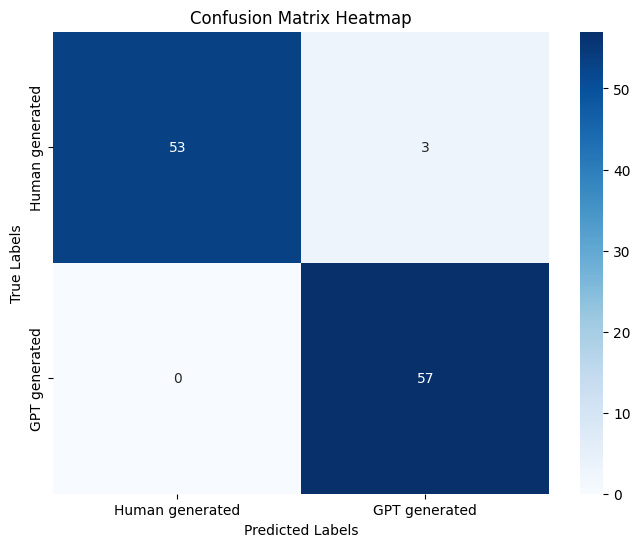

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf

# Prediksi Model
predictions = model.predict(test_dataset.batch(16))
predicted_classes = tf.argmax(predictions.logits, axis=1)

# Membuat confusion matrix
conf_mat = confusion_matrix(test_labels, predicted_classes)

print("Confusion Matrix:")
print(conf_mat)

# Menampilkan laporan klasifikasi
target_names = ['Human generated', 'GPT generated']
print(classification_report(test_labels, predicted_classes, target_names=target_names))

# Membuat heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Misalnya test_texts, test_labels, dan predicted_classes sudah didefinisikan sebelumnya


# Membuat DataFrame
results_df = pd.DataFrame({
    'Text': test_texts,
    'True Label': test_labels,
    'Predicted Label': predicted_classes
})

# Mengubah nilai 0 dan 1 menjadi "human generated" dan "gpt generated"
label_map = {0: "human generated", 1: "gpt generated"}
results_df['True Label'] = results_df['True Label'].map(label_map)
results_df['Predicted Label'] = results_df['Predicted Label'].map(label_map)

results_df.head()


,Text,True Label,Predicted Label
299,the paper focuses on analyzing the gametheoret...,gpt generated,gpt generated
39,we define and solve the toric version of the s...,human generated,human generated
336,the paper thermal noise informatics explores t...,gpt generated,gpt generated
332,tiff tagged image file format is a file format...,gpt generated,gpt generated
153,a fokker action for postminkowski approximatio...,human generated,human generated


## Lebih dari 200

In [ ]:
# Import Library
import pandas as pd
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from transformers import TFBertForSequenceClassification


In [ ]:
import re
df = pd.read_csv('/content/dataset_sampled (1).csv')
def text_preprocessing(text):
    # Mengubah semua karakter menjadi huruf kecil
    text = text.lower()
    text = text.replace('\n', ' ').replace('\r', ' ')
    text = re.sub(r'[^\w\s]', '', text)

    # Menghapus spasi di awal dan akhir teks
    text = text.strip()

    return text


df['text'] = df['text'].apply(lambda x: text_preprocessing(x))

In [ ]:
X = df['text']
y = df['class']

In [ ]:
# Membagi dataset menjadi data pelatihan dan pengujian (75% train, 25% test)
train_texts, test_texts, train_labels, test_labels = train_test_split(X, y, test_size=0.25, random_state=42)

# Membagi data pelatihan menjadi data pelatihan dan validasi (90% train, 10% validation)
train_texts, val_texts, train_labels, val_labels = train_test_split(train_texts, train_labels, test_size=0.1, random_state=42)

In [ ]:
# Menampilkan jumlah data pada masing-masing set
print(f"Jumlah data train: {len(train_texts)}")
print(f"Jumlah data validation: {len(val_texts)}")
print(f"Jumlah data test: {len(test_texts)}")

Jumlah data train: 305
Jumlah data validation: 34
Jumlah data test: 113


In [ ]:
# Assuming train_texts and test_texts are your pandas Series objects
train_texts_list = train_texts.tolist()
test_texts_list = test_texts.tolist()
val_texts_list = val_texts.tolist()

In [ ]:
# Menggunakan tokenizer BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
train_encodings = tokenizer(train_texts_list, truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(test_texts_list, truncation=True, padding=True, max_length=512)
val_encodings = tokenizer(val_texts_list, truncation=True, padding=True, max_length=512)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_labels
))
test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    test_labels
))
val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    val_labels
))

In [ ]:
# Memuat model BERT untuk klasifikasi teks (contoh: sentimen positif/negatif)
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Optimizer
optimizer = tf.keras.optimizers.AdamW(learning_rate=3e-5, weight_decay=0.02)

# Model
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
model.dropout = tf.keras.layers.Dropout(0.2)
model.compile(optimizer=optimizer, loss=model.hf_compute_loss, metrics=['accuracy'])


# Early stopping callback
# early_stopping = tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss',  # metric to monitor
#     patience=3,          # number of epochs with no improvement after which training will be stopped
#     restore_best_weights=True  # restore the model weights from the epoch with the best value of the monitored metric
# )

# Training
history = model.fit(
    train_dataset.shuffle(25).batch(8),
    epochs=25,
    validation_data=val_dataset.batch(8),
    # callbacks=[early_stopping]
)



All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/25
39/39 [==============================] - 90s 1s/step - loss: 0.4824 - accuracy: 0.8197 - val_loss: 0.2537 - val_accuracy: 0.9412
Epoch 2/25
39/39 [==============================] - 35s 886ms/step - loss: 0.2418 - accuracy: 0.9049 - val_loss: 0.0750 - val_accuracy: 0.9706
Epoch 3/25
39/39 [==============================] - 35s 909ms/step - loss: 0.0828 - accuracy: 0.9869 - val_loss: 0.1678 - val_accuracy: 0.9412
Epoch 4/25
39/39 [==============================] - 35s 887ms/step - loss: 0.0535 - accuracy: 0.9902 - val_loss: 0.1400 - val_accuracy: 0.9706
Epoch 5/25
39/39 [==============================] - 35s 903ms/step - loss: 0.0616 - accuracy: 0.9836 - val_loss: 0.0141 - val_accuracy: 1.0000
Epoch 6/25
39/39 [==============================] - 35s 895ms/step - loss: 0.0235 - accuracy: 0.9967 - val_loss: 0.0674 - val_accuracy: 0.9706
Epoch 7/25
39/39 [==============================] - 35s 899ms/step - loss: 0.0149 - accuracy: 0.9967 - val_loss: 0.0405 - val_accuracy: 0.9706
Ep

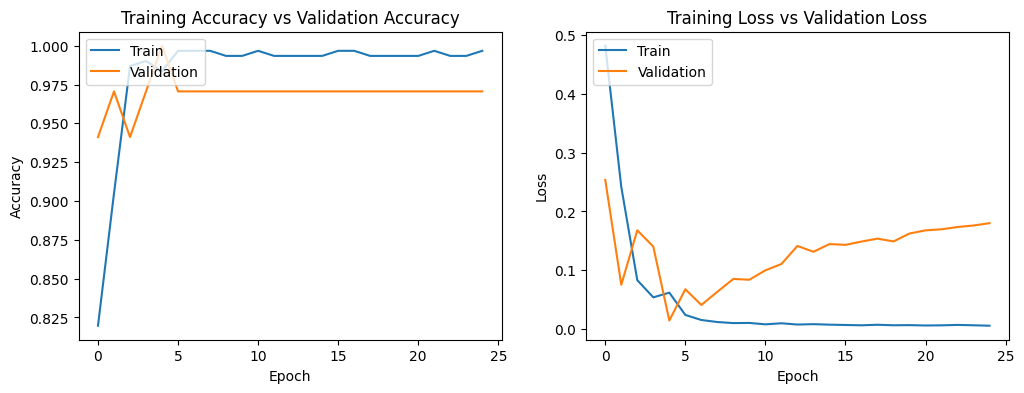

In [ ]:
import matplotlib.pyplot as plt
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
# Evaluasi Model
loss, accuracy = model.evaluate(test_dataset.batch(16))
print("Akurasi:", accuracy)
print("Loss:", loss)

8/8 [==============================] - 6s 381ms/step - loss: 0.1805 - accuracy: 0.9735
Akurasi: 0.9734513163566589
Loss: 0.1804678738117218


8/8 [==============================] - 6s 384ms/step
Confusion Matrix:
[[54  2]
 [ 1 56]]
                 precision    recall  f1-score   support

Human generated       0.98      0.96      0.97        56
  GPT generated       0.97      0.98      0.97        57

       accuracy                           0.97       113
      macro avg       0.97      0.97      0.97       113
   weighted avg       0.97      0.97      0.97       113



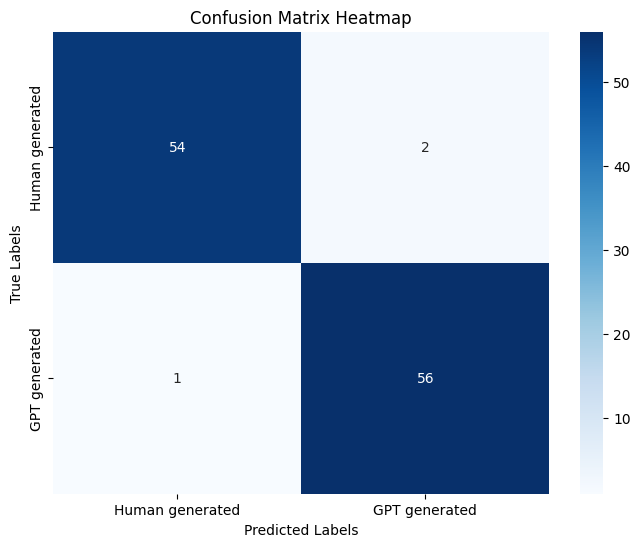

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf

# Prediksi Model
predictions = model.predict(test_dataset.batch(16))
predicted_classes = tf.argmax(predictions.logits, axis=1)

# Membuat confusion matrix
conf_mat = confusion_matrix(test_labels, predicted_classes)

print("Confusion Matrix:")
print(conf_mat)

# Menampilkan laporan klasifikasi
target_names = ['Human generated', 'GPT generated']
print(classification_report(test_labels, predicted_classes, target_names=target_names))

# Membuat heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Misalnya test_texts, test_labels, dan predicted_classes sudah didefinisikan sebelumnya


# Membuat DataFrame
results_df = pd.DataFrame({
    'Text': test_texts,
    'True Label': test_labels,
    'Predicted Label': predicted_classes
})

# Mengubah nilai 0 dan 1 menjadi "human generated" dan "gpt generated"
label_map = {0: "human generated", 1: "gpt generated"}
results_df['True Label'] = results_df['True Label'].map(label_map)
results_df['Predicted Label'] = results_df['Predicted Label'].map(label_map)

results_df.head()


,Text,True Label,Predicted Label
299,access control matrix acm is a security model ...,gpt generated,gpt generated
39,the galactic center gc is a dense and chaotic ...,human generated,human generated
336,here are several types of charts commonly used...,gpt generated,gpt generated
332,telecommuting also known as teleworking or rem...,gpt generated,gpt generated
153,access control matrix means preparing a system...,human generated,human generated
